<a href="https://colab.research.google.com/github/leunco/Hands_On_MachineLearning/blob/main/2%EC%A3%BC%EC%B0%A8/%EA%B9%80%EB%8B%A4%EC%98%81/Chap5_SVM(%EC%84%9C%ED%8F%AC%ED%8A%B8%EB%B2%A1%ED%84%B0%EB%A8%B8%EC%8B%A0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

## Chap5. 서포트 벡터 머신(SVM)
**서포트 벡터 머신(SVM)**은 매우 강력하고 선형이나 비선형 분류, 회귀, 이상치 탐색에서 사용할 수 있는 다목적 머신러닝 모델이다.

특히 SVM은 복잡한 분류 문제에 잘 들어맞으며 작거나 중간 크기의 데이터셋에 적합하다.

## 5.1 선형 SVM 분류
다음 그림은 2개의 클래스를 선형적으로 분류한 그림이다.

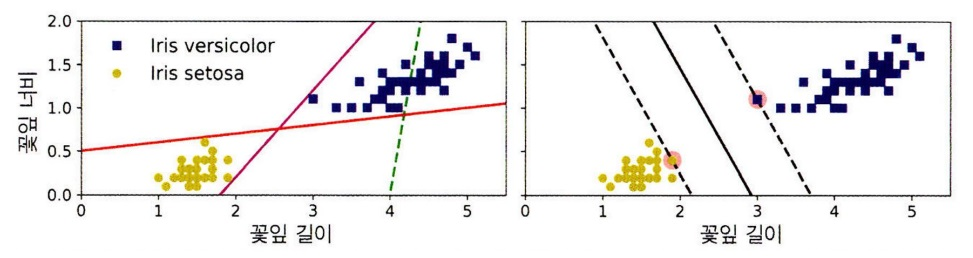

왼쪽 그래프는 3개의 선형 분류기에서 만들어진 결정 경계를 임의의 직선으로 그린 것이다. 점선으로 나타난 결정 경계를 만든 모델은 클래스를 적절하게 분류하지 못하고 있으나, 다른 두 모델은 훈련 세트에 대해 완벽하게 동작한다. 그러나 결정 경계가 샘플에 매우 가까워 새로운 샘플에 대해서는 아마 잘 작동하지 못할 것이다.

오른쪽 그래프에 있는 실선은 **SVM 분류기의 결정 경계**이다. 이 직선은 2개의 클래스를 나누고 있을 뿐만 아니라, 제일 가까운 훈련 샘플로부터 가능한 멀리 떨어져 있다.

SVM 분류기를 클래스 사이에 가장 폭이 넓은 도로를 찾는 것으로 생각할 수 있다. 따라서 SVM을 **라지 마진 분류**라고도 한다.

도로 가장 바깥 쪽에 훈련 샘플을 더 추가해도 결정 경계에는 전혀 영향을 미치지 않으며, 도로 경계에 위치한 샘플에 의해 전적으로 결정된다. 이렇게 **결정 경계에 영향**을 미치는 샘플들을 **서포트 벡터**라고 한다.

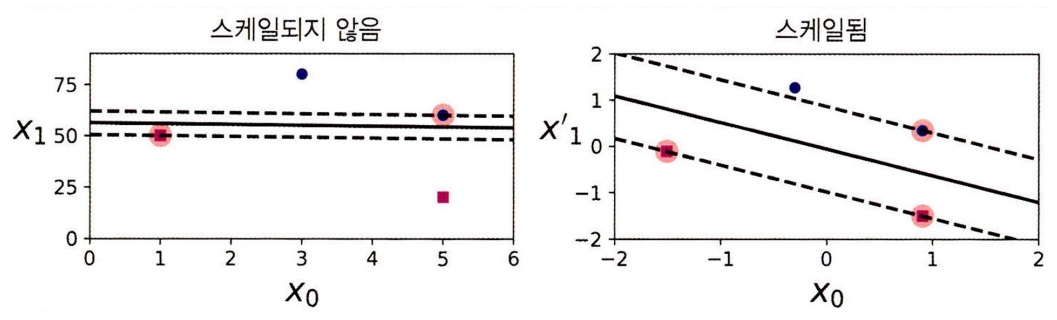

SVM은 특성의 스케일에 민감하다.

왼쪽 그림에서 수직축의 스케일이 수평축의 스케일보다 훨씬 커서 가장 폭이 넓은 도로가 거의 수평에 가깝게 된다.

이때 사이킷런의 `StandardScaler`를 사용하는 등 특성의 스케일을 조정하면 오른쪽 그래프와 같이 결정 경계가 훨씬 좋아진다.

### 5.1.1 소프트 마진 분류
모든 샘플이 **도로 바깥 쪽에 올바르게 분류**되어 있는 것을 **하드 마진 분류**라고 한다.

하드 마진 분류는 데이터가 **선형적으로 구분될 수 있어야 제대로 작동**하고, **이상치에 민감**하다는 문제점이 있다.

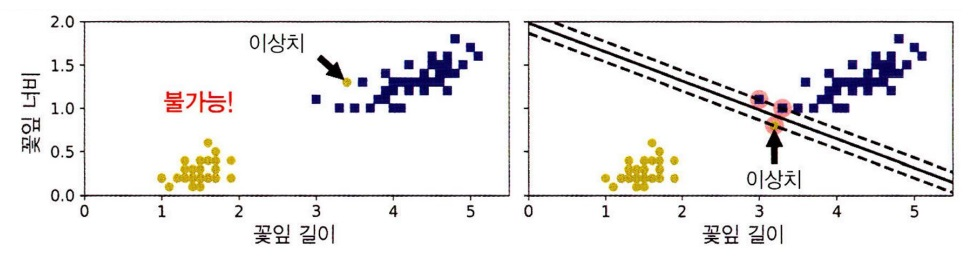

위의 그림을 보면 붓꽃 데이터셋에 이상치가 하나 있다. 따라서 왼쪽 그림에서는 하드 마진을 찾을 수 없다. 오른쪽 그림의 결정 경계는 이상치가 없던 위의 그림의 결정 경계와 매우 다르고 일반화가 잘 될 것 같지 않다.

이런 문제를 피하려면 좀 더 유연한 모델이 필요한데, **도로의 폭을 가능한 넓게 유지**하는 것과 샘플이 도로 중간이나 반대쪽에 있는 **마진 오류 사이에 적절한 균형**을 잡아야 한다. 이를 **소프트 마진 분류**라고 한다.

사이킷런의 SVM 모델을 만들 때 여러 하이퍼파라미터를 지정할 수 있다.

`C는 하이퍼파라미터 중 하나로, 도로의 폭을 넓게 유지하는 것와 마진 오류를 줄이는 것 사이의 균형을 조절하는 역할을 한다.

`C`를 작게 설정하면

- 도로의 폭이 넓다. 넓은 마진이다.
- 마진 오류가 많다.

반대로 `C`를 크게 설정하면

- 도로의 폭이 좁다. 좁은 마진이다.
- 마진 오류가 적다.

다음의 코드는 붓꽃 데이터셋의 특성 스케일을 변경하고 Verginica 품종을 감지하기 위한 선형 SVM 모델을 훈련시킨다.

이를 위해 `C=1`로 지정하고 힌지 손실 함수를 적용한 `LinearSVC` 클래스를 사용한다.

SVM 분류기는 로지스틱 회귀 분류기와는 다르게 클래스에 대한 확률을 제공하지 않는다.

In [ ]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] #꽃잎 길이, 너비
y = (iris['target']==2).astype(np.float64)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

`LinearSVC` 클래스를 선형 커널을 사용하는 `SVC` 클래스로 대체할 수 있는데, 인자로 `kernel='linear', C=1`를 지정하면 된다.

또 다른 방법은 `SGDClassifier(loss='hinge', alpha=1/(m*C))`로 SGDClassifier 모델을 사용하는 것이다. 이 모델은 선형 SVM 분류기를 훈련시키기 위해 일반적인 확률적 경사 하강법을 사용한다.

## 5.2 비선형 SVM 분류
비선형 데이터셋을 다루는 한가지 방법은 다항 특성과 같은 특성을 더 추가하는 것이다.

사이킷런을 사용하여 이를 구현하려면 `PolynomialFeatures` 변환기와 `StandardScaler, LinearSVC`를 연결하여 Pipeline을 만든다.

이 파이프라인을 moons 데이터셋에 적용한다. 이 데이터셋은 마주보는 2개의 반원 모양으로 데이터 포인트가 놓여있는 이진 분류를 위한 작은 데이터셋이다. `make_moons()` 함수를 사용하여 이 데이터셋을 만들 수 있다.

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15)

import pandas as pd
moons = pd.DataFrame({'X1':X[:,0],
                      'X2':X[:,1],
                      'y':y})

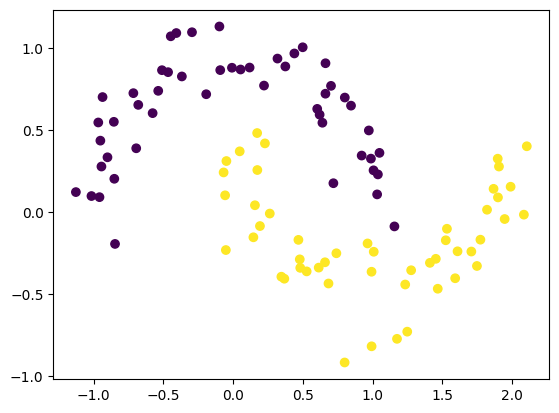

In [ ]:
import matplotlib.pyplot as plt
plt.scatter('X1', 'X2', data=moons, c='y')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

비선형 SVM 분류기를 이용하여 예측한 결과 클래스를 기준으로 색상을 다르게 하여 확인한 결과, 분류가 매우 잘 되었음을 확인할 수 있다.

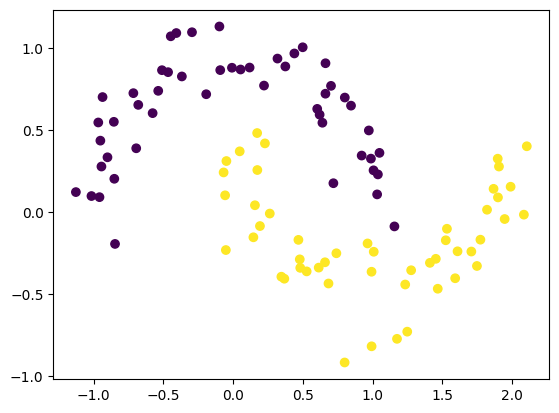

In [ ]:
pred_y = polynomial_svm_clf.predict(X)
moons['pred_y'] = pred_y

plt.scatter('X1', 'X2', data=moons, c='pred_y')
plt.show()

### 5.2.1 다항식 커널
다항식 특성을 추가하는 것은 간단하고 모든 머신러닝 알고리즘에서 잘 작동한다. 하지만 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고, 높은 차수의 다항식은 굉장히 많은 특성을 추가하게 되므로 모델을 느리게 만든다.

다행히도 SVM을 사용할 때에는 **커널 트릭**이라는 수학적 기교를 적용할 수 있다. 커널 트릭은 **실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과**를 얻을 수 있다.

이 방법은 `SVC` 파이썬 클래스에 구현되어 있다. moons 데이터셋을 이용하여 테스트한다.

다음의 코드는 3차 다항식 커널을 사용하여 SVM 분류기를 훈련시킨다. 매개변수 `coef0`은 모델이 높은 차수와 낮은 차수에 **얼마나 영향을 받을지 조절**한다.

모델이 데이터에 과대적합되었다면 다항식의 차수를 줄여야하며, 반대로 과소적합되었다면 다항식의 차수를 줄여야한다.

In [ ]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

### 5.2.2 유사도 특성
비선형 특성을 다루는 또 다른 방법은 **각 샘플이 특정 랜드마크와 얼마나 닮았는지를 측정**하는 **유사도 함수로 계산한 특성을 추가**하는 것이다.

이때 유사도 함수로 **가우시안 방사 기저 함수(RBF)**를 사용할 수 있다.

> ***가우시안 방사 기저 함수(RBF)***

$𝜙_𝛾(𝐱, 𝒍)= \exp(-𝛾||𝐱-𝒍||^2)$

이 함수의 값은 **랜드마크에서 아주 멀리 떨어진 0**부터 **랜드마크와 같은 위치인 1**까지 변화하며, **종 모양**으로 나타난다.



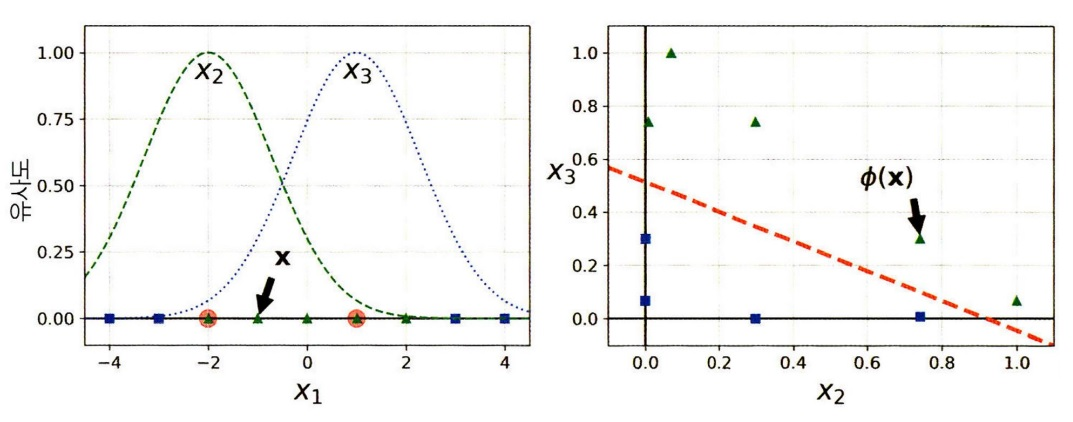

예를 들어 앞의 1차원 데이터셋에 2개의 랜드마크 $x_1=-2, x_1=1$을 추가한다. 위의 왼쪽 그림에서 주황색 원으로 표현된 것이다. 그리고 $𝛾=0.3$인 가우시안 방사 기저 함수를 유사도 함수로 정의한다.

그리고 $x_1=-1$ 샘플을 살펴보면, 이 샘플은 첫번째 랜드마크 -2에서 1만큼 떨어져있고 두번째 랜드마크 1에서 2만큼 떨어져있다.

따라서 새로 만든 특성은 $x_2=\exp(-0.3 𝗑 1^2) \approx 0.74, x_3=\exp(-0.3 𝗑 2^2) \approx 0.3$이다.

오른쪽 그림에서 원본 특성을 제외한 변환된 데이터셋을 볼 수 있는데, 이제 선형적으로 구분이 가능함을 알 수 있다.

랜드마크를 어떻게 선택하는지에 대한 가장 간단한 방법은 데이터셋에 있는 모든 샘플 위치에 랜드마크를 설정하는 것이다. 이렇게 하면 차원이 매우 커지고, 변환된 훈련 세트가 선형적으로 구분될 가능성이 높다.

그러나 훈련 세트에 있는 n개의 특성을 가진 m개의 샘플이, m개의 특성을 가진 m개의 샘플로 변환된다는 단점이 있다. 훈련 세트가 매우 클 경우 동일한 크기의 아주 많은 특성이 만들어진다.

### 5.2.3 가우시안 RBF 커널
다항 특성 방식과 마찬가지로 유사도 특성 방식도 머신러닝 알고리즘에 유용하게 사용될 수 있다. 추가 특성을 모두 계산하려면 연산 비용이 많이 들고, 특히 훈련 세트가 클수록 더 그렇다.

이때 SVM의 특징인 실제로는 특성을 추가하지 않지만 동일한 효과를 얻을 수 있는 커널 트릭의 장점을 살려서 유사도 특성을 많이 추가하는 것과 같은 비슷한 결과를 얻을 수 있다.

이를 위해서는 사이킷런으로 가우시안 RBF 커널을 사용한 `SVC` 모델을 시도할 수 있다.

In [ ]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

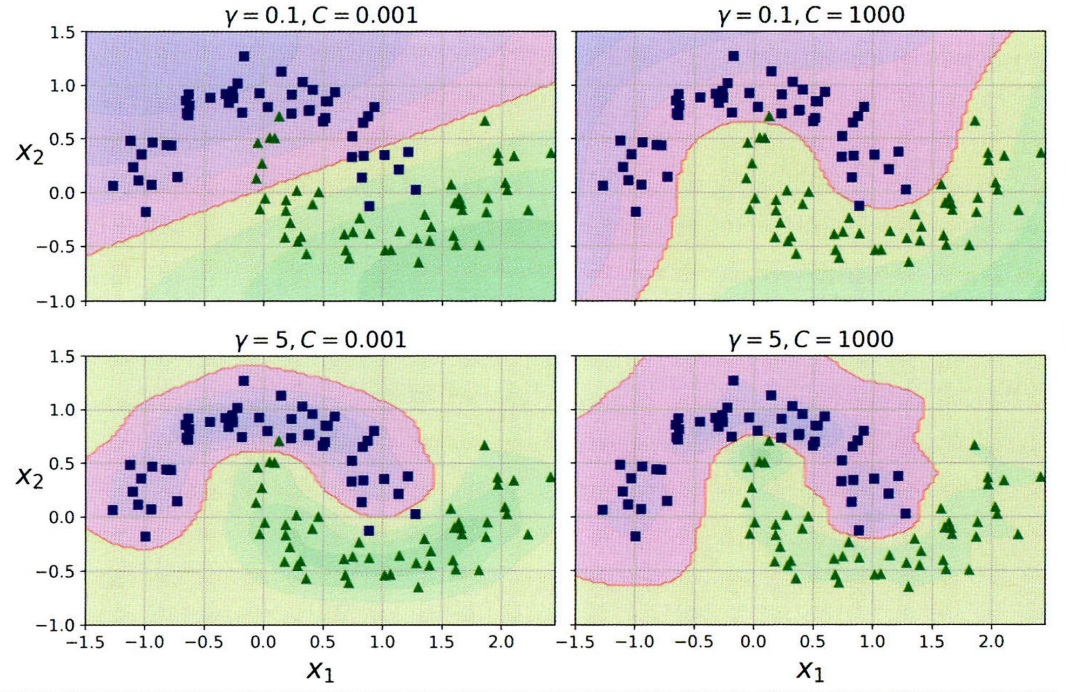

위의 코드는 왼쪽 아래의 모델이고, 나머지는 하이퍼파라미터 `gamma`와 `C`를 바꿔서 훈련시킨 모델들이다.

다른 하이퍼파라미터가 동일할 때, **`gamma`를 증가**시키면 가우시안 방사 기저 함수의 종 모양 그래프가 좁아져서 **각 샘플의 영향 범위가 작아진다**. 따라서 **결정 경계가 조금 더 불규칙**해지고 **각 샘플을 따라**서 구불구불하게 휘어진다.

반대로 **`gamma`가 작을 때**는 넓은 종 모양 그래프를 만들며, **샘플이 넓은 범위에 영향**을 주므로 **결정 경계가 더 부드러워진다.**

결국 하이퍼파라미터 **`𝛾`가 규제의 역할**을 하므로, 모델이 과대적합일 경우에는 감소시키고 과소적합일 경우에는 증가시켜야 한다.

### 5.2.4 계산 복잡도
`LinearSVC` 파이썬 클래스는 선형 SVM을 위한 최적화된 알고리즘을 구현한 liblinear 라이브러리를 기반으로 한다. 이 라이브러리는 커널 트릭을 지원하지 않지만 훈련 샘플과 특성 수에 거의 선형적으로 늘어난다. 이 알고리즘의 **훈련 시간 복잡도는 대략 $𝑂(m𝗑n)$** 정도이다.

**정밀도를 높이면 알고리즘의 수행 시간이 길어**지는데, 이는 **허용오차** 하이퍼파라미터 $𝜺$으로 조절한다. 사이킷런에서 매개변수 `tol`로 나타나며, 대부분의 분류 문제는 허용오차를 기본값으로 두면 잘 작동한다.


`SVC`는 커널 트릭 알고리즘을 구현한 libsvm 라이브러리를 기반으로 하고, **훈련 시간 복잡도는 보통 $𝑂(m^2𝗑n), 𝑂(m^3𝗑n)$ 사이**이다. 불행하게도 이는 **훈련 샘플 수가 커지면 훈련 시간이 엄청나게 느려진다**는 것을 의미한다. 복잡하지만 작거나 중간 규모의 훈련 세트에 이 알고리즘이 잘 맞는다.

하지만 특성의 개수에는, 특히 **각 샘플에 0이 아닌 특성이 몇 개 없는 희소 특성**인 경우에는 잘 확장된다. 이런 경우 알고리즘의 성능이 샘플이 가진 0이 아닌 특성의 평균 수에 거의 비례한다.

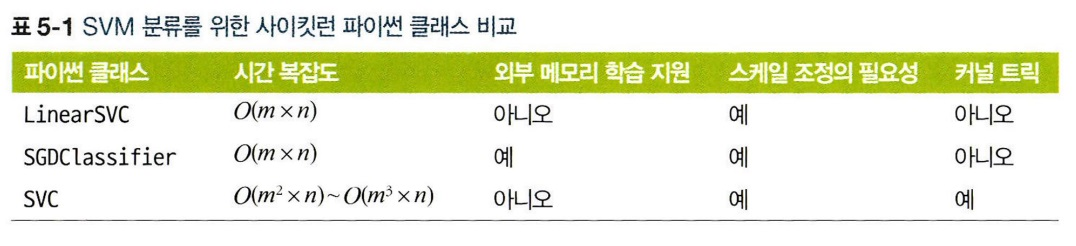

## 5.3 SVM 회귀
SVM 알고리즘은 선형, 비선형 분류뿐만 아니라 선형, 비선형 회귀에도 사용할 수 있다.

SVM을 분류가 아닌 회귀에 적용하는 방법은 목표를 반대로 하는 것이다. SVM 분류는 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 최대가 되도록 하는 반면, **SVM 회귀**는 **제한된 마진 오류 안에서 도로 안에 가능한 많은 샘플이 들어가도록 학습**한다. 도로의 폭은 하이퍼파라미터 $𝜺$로 조절한다.

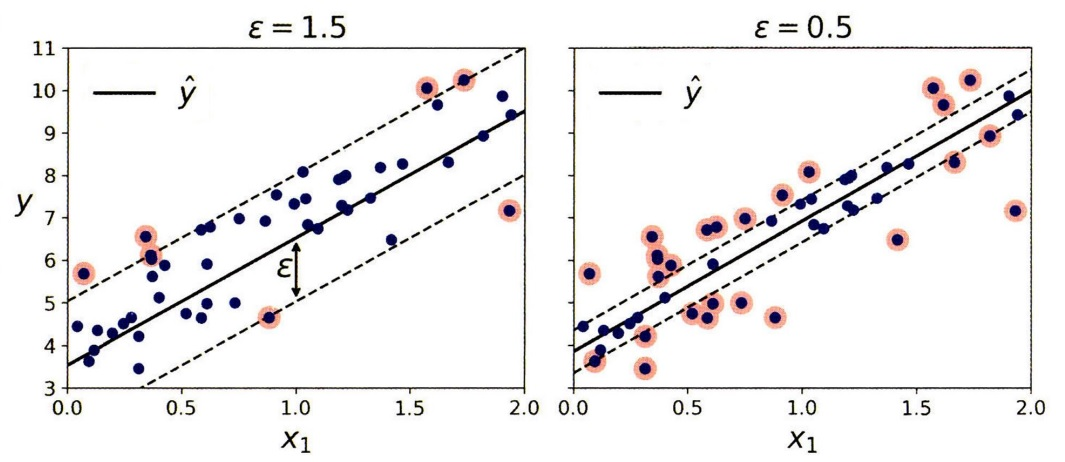

다음 그림은 무작위로 생성한 선형 데이터셋에 훈련시킨 2개의 선형 SVM 회귀 모델을 보여준다. 왼쪽 그림은 𝜺=1.5로 마진이 크게 하고, 오른쪽 그림은 𝜺=0.5로 마진을 작게 하여 만든 것이다.

마진 안에서는 **훈련 샘플이 추가**되어도 모델의 **예측에 영향이 없다**. 그래서 이 모델을 **𝜺에 민감하지 않다**고 한다.

사이킷런의 `LinearSVR`을 사용하여 선형 SVM 회귀를 적용한다.

다음은 위의 그림 중에서 왼쪽에 해당하는 모델을 만드는 코드이다.

In [ ]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

**비선형** 데이터셋에 대해 **회귀** 작업을 수행하려면 **커널 SVM 모델**을 사용해야 한다.

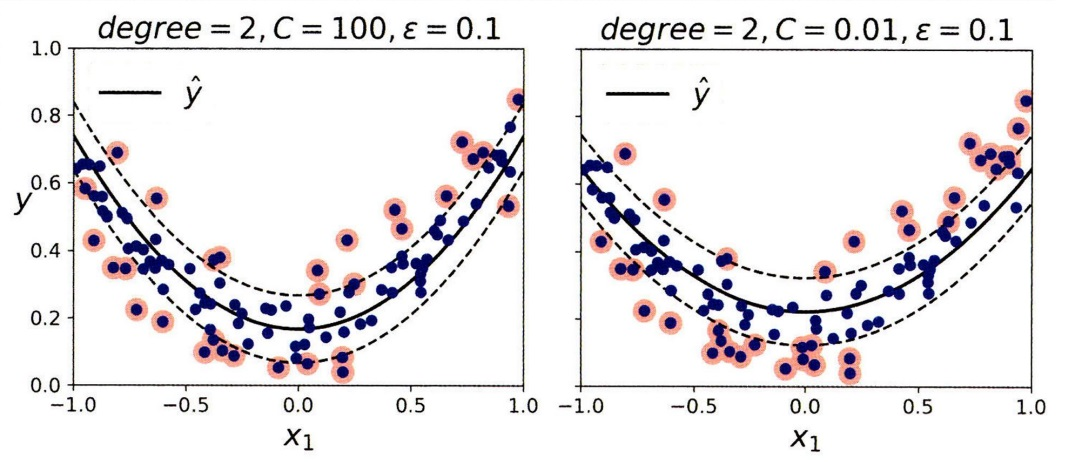

위의 그림은 임의의 2차방정식 형태의 훈련 세트에 2차 다항 커널을 사용한 SVM 회귀를 보여준다. 왼쪽 그림은 규제가 거의 없는 아주 큰 `C`를 사용하고, 오른쪽 그림은 규제가 훨씬 많은 작은 `C`를 사용한 것이다.

다음의 코드를 수행하면 커널 트릭을 제공하는 사이킷런의 `SVR`을 사용하여 왼쪽 그림에 해당하는 모델을 만들 수 있다.

In [ ]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

`LinearSVR`은 `LinearSVC`의 회귀 버전이고, `SVR`은 `SVC`의 회귀 버전이다.

`LinearSVR`은 `LinearSVC`처럼 훈련에 필요한 시간이 훈련 세트의 크기에 비례하여 선형적으로 늘어난다.

그러나 `SVR`은 `SVC`처럼 훈련 세트가 커지면 커질수록 훨씬 느려진다.

## 5.4 SVM 이론
SVM의 예측은 어떻게 이뤄지는지, SVM의 훈련 알고리즘이 어떻게 작동하는지 살펴본다.

먼저 표기법을 정리한다.

편향 $\theta_0$와 입력 특성의 가중치 $\theta_1,...,\theta_n$까지 전체 모델 파라미터를 하나의 벡터 $𝜽$라고 하고, 모든 샘플에 편항에 해당하는 입력값 $x_0=1$을 추가한다.

SVM의 설명의 편리함을 위해 편향을 $b$라고 하고, 특성의 가중치 벡터를 $𝐰$라고 한다. 따라서 입력 특성 벡터에 편향을 위한 특성이 추가되지 않는다.

### 5.4.1 결정 함수와 예측
선형 SVM 분류기 모델은 단순히 결정 함수 $𝐰^T𝐱+b=w_1𝑥_1+...+w_nx_n+b$를 계산해서 새로운 샘플 𝐱의 클래스를 예측한다. 결과값이 0보다 크면 예측된 클래스 $\hat y$은 양성 클래스 1이 된다. 반대로 결과값이 0보다 작으면 음성 클래스 0이 된다.

$\hat y =
\begin{cases}
0, &\text {$𝐰^T𝐱+b<0$} \\
1, &\text {$𝐰^T𝐱+b\geq0$}
\end{cases}$

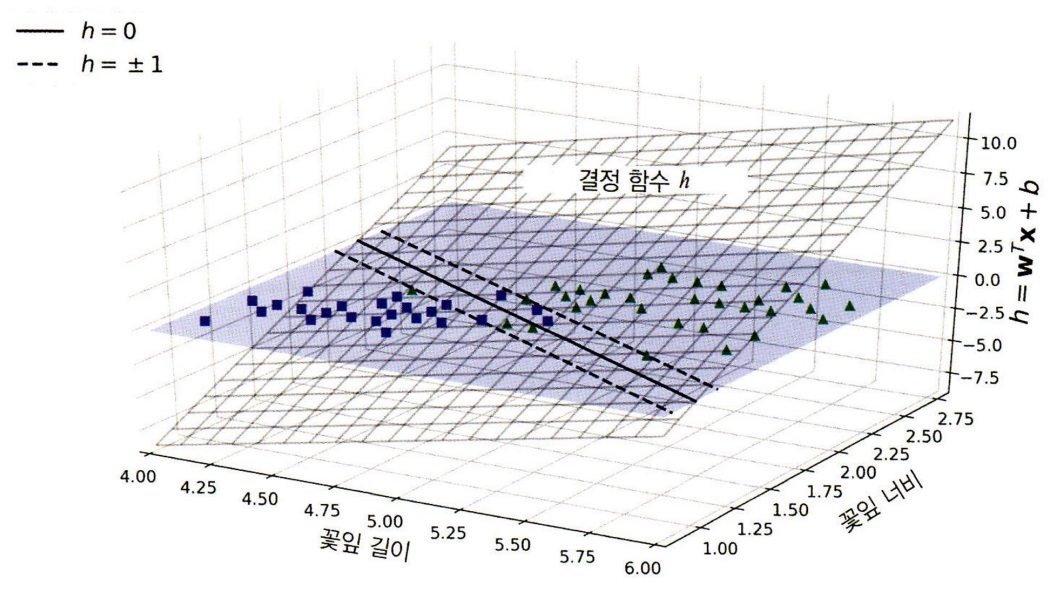

위의 그림은 꽃잎의 너비와 길이를 특성으로 갖는 데이터셋에 대한 모델의 결정 함수이다. 특성이 2개이므로 2차원 평면이다.

**결정 경계**는 **결정 함수의 값이 0인 점들**로 이루어져 있다. 이는 **두 평면의 교차점**으로, 직선이다. 그림에서는 굵은 실선에 해당한다.

점선은 결정 함수의 값이 1 또는 -1인 점들을 나타낸다. 이 점선은 결정 경계에 나란하고 일정한 거리만큼 떨어져서 마진을 형성하고 있다.

**선형 SVM 분류기를 훈련**한다는 것은 **하드 마진**으로 마진 오류를 하나도 발생하지 않거나 **소프트 마진**으로 제한적인 마진 오류를 가지면서 **가능한 마진을 크게 하는 𝐰와 b를 찾는 것**이다.

### 5.4.2 목적 함수
결정 함수의 기울기를 생각해보면 이는 가중치 벡터의 노름 ||𝐰||과 같다. 이 기울기를 2로 나누면 결정 함수 값이 $\pm1$이 되는 점들이 결정 경계로부터 2배만큼 멀어진다. 즉 기울기를 2로 나누는 것은 마진에 2를 곱하는 것과 같다.

**가중치 벡터 𝐰가 작을수록 마진은 커지는 것**이다.

**마진을 크게 하기 위해 ||𝐰||를 최소화**하려고 할 때, **하드 마진**으로 마진 오류를 하나도 만들지 않으려면 **결정 함수가 모든 양성 훈련 샘플에서는 1보다 커야 하고 음성 훈련 샘플에서는 -1보다 작아야 한다.**

음성 샘플$(y^{(i)}=0)$일 때 $t^{(i)}=-1$로, 양성 샘플$(y^{(i)}=1)$일 때 $t^{(i)}=1$로 정의하면 앞서 말한 제약 조건을 모든 샘플에서 $t^{(i)}(𝐰^T𝐱^{(i)}+b)\geq1$로 표현할 수 있다.

그러므로 하드 마진 선형 SVM 분류기의 목적 함수를 다음과 같이 제약이 있는 최적화 문제로 표현할 수 있다.

> ***하드 마진 선형 SVM 분류기의 목적 함수***

minimize $\frac{1}{2}𝐰^T𝐰$
[조건] i=1,...,m 일 때 $t^{(i)}(𝐰^T𝐱^{(i)}+b)\geq1$

**소프트 마진** 분류기의 목적 함수를 구성하려면 **각 샘플에 대해 0보다 크거나 같은 슬랙 변수**를 도입해야 한다. 슬랙 변수는 i번째 샘플이 얼마나 마진을 위반할지 결정한다.

이 문제는 2개의 상충되는 목표를 가지고 있는데, **마진 오류를 최소화하기 위해 가능한 슬랙 변수의 값을 작게** 만드는 것과 **마진을 크게 하기 위해 가능한 $\frac{1}{2}𝐰^T𝐰$를 작게** 만드는 것이다.

이를 위해 하이퍼파라미터 `C`가 등장하며, 이 하이퍼파라미터는 두 목표 사이의 트레이드오프를 정의한다.

### 5.4.3 콰드라틱 프로그래밍
하드 마진과 소프트 마진 문제는 모두 선형적인 제약 조건이 있는 볼록 함수의 이차 최적화 문제이다. 이런 문제를 **콰드라틱 프로그래밍(QP)**이라고 한다.

### 5.4.4 쌍대 문제
원 문제(primal problem)라는 제약이 있는 최적화 문제가 주어지면 쌍대 문제(dual problem)라고 하는 깊게 관련된 다른 문제로 표현할 수 있다.

일반적으로 쌍대 문제의 해는 원 문제 해의 하한값이지만, 어떤 조건하에서는 원 문제와 똑같은 해를 제공한다. SVM 문제는 이러한 조건을 만족하여 동일한 해를 제공하므로 원 문제와 쌍대 문제 중 하나를 선택하여 풀 수 있다. **훈련 샘플 수가 특성 개수보다 작을 때**, 원 문제보다 **쌍대 문제**를 푸는 것이 더 빠르다.

> ***선형 SVM 목적 함수의 쌍대 형식***

minimize $\frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha^{(i)}\alpha^{(j)}t^{(i)}t^{(j)}{𝐱^{(i)}}^T𝐱^{(j)}-\sum_{i=1}^m\alpha^{(i)}$

[조건] i=1,...,m 일 때, $\alpha^{(i)}\geq0$

이 식을 최소화하는 벡터 $\hat\alpha$를 찾았다면 다음의 식을 사용하여 원 문제의 식을 최소화하는 $\hat w$과 $\hat b$를 계산할 수 있다.

> ***쌍대 문제에서 구한 해로 원 문제의 해 계산하기***

- $\hat w=\sum_{i=1}^m{\hat\alpha}^{(i)}t^{(i)}𝐱^{(i)}$
- $\hat b=\frac{1}{n_s}\sum_{i=1}^m(t^{(i)}-{\hat w}^T𝐱^{(i)})$